# Drawing the multipanel barplot for Soil moisture: all AR6 land regions

In [1]:
ensembles = c('CMIP6','CMIP5','CORDEX')
GWLs = c('1.5','2','4')
scenarios = c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

data = list()
for (ensemble in ensembles){
    data[[ensemble]] = list()
    for (GWL in GWLs){
        data[[ensemble]][[GWL]] = list()
    }
    for (scenario in scenarios){
        data[[ensemble]][[scenario]] = list()
    }

}

## 1. Get the data from the json files

In [3]:
library(rjson)

Warning message:
“package ‘rjson’ was built under R version 3.6.3”


In [ ]:
CWD = getwd()

In [4]:
# -- CMIP6
ensemble = 'CMIP6'
json_file = paste(CWD,'/../../data/Figure_S12.4/',ensemble,'_SM_diff_perc2020_AR6_regional_averages.json',sep='')

json_data <- fromJSON(paste(readLines(json_file), collapse=""))
AR6_regions = names(json_data[['1.5']])

In [5]:
AR6_regions

[1] "ARP"  "CAF"  "CAR"  "CAU"  "CNA"  "EAN"  "EAS"  "EAU"  "ECA"  "EEU" 
[11] "ENA"  "ESAF" "ESB"  "GIC"  "MDG"  "MED"  "NAU"  "NCA"  "NEAF" "NEN" 
[21] "NES"  "NEU"  "NSA"  "NWN"  "NWS"  "NZ"   "RAR*" "RFE"  "SAH"  "SAM" 
[31] "SAS"  "SAU"  "SCA"  "SEA"  "SEAF" "SES"  "SSA"  "SWS"  "TIB"  "WAF" 
[41] "WAN"  "WCA"  "WCE"  "WNA"  "WSAF" "WSB"

### Prepare R list with all the regions => Get the regions list from the CMIP6 json file, for GWL 1.5K

In [6]:
all_regions = list()
GWLs = c('1.5','2','4')
scenarios = c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

for (region_name in AR6_regions){
    all_regions[[region_name]] = list()
    for (ensemble in c('CMIP6','CMIP5','CORDEX')){
        all_regions[[region_name]][[ensemble]] = list()
        for (GWL in GWLs){
            all_regions[[region_name]][[ensemble]][[GWL]] = list()
        }#end for GWL
        for (scenario in scenarios){
            all_regions[[region_name]][[ensemble]][[scenario]] = list()
        }#end for scenario
    }#end for ensemble
}#end for region_name

In [7]:
ensemble = 'CMIP6'
json_file = paste(CWD,'/../../data/Figure_S12.4/',ensemble,'_SM_diff_perc2020_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))

for (clim_period in names(json_data)){
    if (clim_period=='historical_1995-2014'){ wclim_period='modern' }
    if (clim_period=='ssp585_2041-2060'){ wclim_period='8.5_mid' }
    if (clim_period=='ssp585_2081-2100'){ wclim_period='8.5_late' }
    if (clim_period=='ssp126_2041-2060'){ wclim_period='2.6_mid' }
    if (clim_period=='ssp126_2081-2100'){ wclim_period='2.6_late' }
    if (clim_period=='1.5'){ wclim_period='1.5' }
    if (clim_period=='2'){ wclim_period='2' }
    if (clim_period=='3'){ wclim_period='3' }
    if (clim_period=='4'){ wclim_period='4' }
    print(wclim_period)
    for (region_name in names(json_data[[clim_period]])){
        percentiles = json_data[[clim_period]][[region_name]]
        if (percentiles[1]==-99999){
            percentiles = c(NA, NA, NA)
        }
        all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = percentiles
        print(json_data[[clim_period]][[region_name]])
    }
}

[1] "1.5"
[1] -1.2885422  0.5445782  3.6110764
[1] -0.7128763  0.9816780  6.7050053
[1] -99999 -99999 -99999
[1] -3.8937364 -0.6879645  1.7413329
[1] -4.9006986 -0.8988124  2.0710563
[1] -99999 -99999 -99999
[1] -0.79376506  0.06865235  1.22560076
[1] -7.286620 -1.697951  2.037519
[1] -0.7838228  0.2691904  1.7436126
[1] -2.01556697 -0.05050235  2.35107873
[1] -1.1819238 -0.1572058  1.3461238
[1] -3.2123940 -1.0065561  0.8655578
[1] -4.782774 -0.958747  3.535488
[1] -2.6116697 -0.6454128  5.2796599
[1] -3.0268345 -0.4235739  1.8956304
[1] -3.18255478 -1.75902503 -0.09960144
[1] -3.570861 -0.314577  3.873505
[1] -3.8413150 -0.4644611  1.2823903
[1] -0.6263897  2.0569381  4.4368621
[1] -2.790832 -0.742187  6.256703
[1] -2.1312438 -0.6374314  0.9621482
[1] -1.68402506 -0.09378213  1.50233645
[1] -3.644228 -1.371524  0.282072
[1] -2.23842365 -0.06826023  3.92995540
[1] -1.3994546 -0.6290396  0.5613801
[1] -1.77268690 -0.06256457  1.43415982
[1] -2.39191604  0.07704171 10.87791802
[1] -3.97

In [8]:
names(json_data)

[1] "1.5"                                  
 [2] "1.5_historical_1995-2014"             
 [3] "2"                                    
 [4] "2_historical_1995-2014"               
 [5] "3"                                    
 [6] "3_historical_1995-2014"               
 [7] "4"                                    
 [8] "4_historical_1995-2014"               
 [9] "ssp126_2041-2060"                     
[10] "ssp126_2041-2060_historical_1995-2014"
[11] "ssp126_2081-2100"                     
[12] "ssp126_2081-2100_historical_1995-2014"
[13] "ssp585_2041-2060"                     
[14] "ssp585_2041-2060_historical_1995-2014"
[15] "ssp585_2081-2100"                     
[16] "ssp585_2081-2100_historical_1995-2014"

In [10]:
ensemble = 'CMIP5'
json_file = paste(CWD,'/../../data/Figure_S12.4/',ensemble,'_SM_diff_perc2020_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))


clim_periods = c('baseline',
                 'rcp85_midfut', 'rcp85_farfut',
                 'rcp26_midfut', 'rcp26_farfut',
                 '1.5', '2', '3', '4')
for (clim_period in names(json_data)){
    if (clim_period=='baseline'){ wclim_period='modern' }
    if (clim_period=='rcp85_mid'){ wclim_period='8.5_mid' }
    if (clim_period=='rcp85_far'){ wclim_period='8.5_late' }
    if (clim_period=='rcp26_mid'){ wclim_period='2.6_mid' }
    if (clim_period=='rcp26_far'){ wclim_period='2.6_late' }
    if (clim_period=='1.5'){ wclim_period='1.5' }
    if (clim_period=='2'){ wclim_period='2' }
    if (clim_period=='3'){ wclim_period='3' }
    if (clim_period=='4'){ wclim_period='4' }
    print(wclim_period)
    for (region_name in names(json_data[[clim_period]])){
        percentiles = json_data[[clim_period]][[region_name]]
        if (percentiles[1]==-99999){
            percentiles = c(NA, NA, NA)
        }
        all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = percentiles
    }
}

[1] "1.5"
[1] "2"
[1] "3"
[1] "4"
[1] "2.6_late"
[1] "2.6_mid"
[1] "8.5_late"
[1] "8.5_mid"


In [11]:
ensemble = 'CORDEX'
json_file = paste(CWD,'/../../data/Figure_S12.4/',ensemble,'_SM_diff_perc2020_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))


clim_periods = c('baseline',
                 'rcp85_midfut', 'rcp85_farfut',
                 'rcp26_midfut', 'rcp26_farfut',
                 '1.5', '2', '3', '4')
for (clim_period in names(json_data)){
    if (clim_period=='baseline'){ wclim_period='modern' }
    if (clim_period=='rcp85_mid'){ wclim_period='8.5_mid' }
    if (clim_period=='rcp85_far'){ wclim_period='8.5_late' }
    if (clim_period=='rcp26_mid'){ wclim_period='2.6_mid' }
    if (clim_period=='rcp26_far'){ wclim_period='2.6_late' }
    if (clim_period=='1.5'){ wclim_period='1.5' }
    if (clim_period=='2'){ wclim_period='2' }
    if (clim_period=='3'){ wclim_period='3' }
    if (clim_period=='4'){ wclim_period='4' }
    print(wclim_period)
    for (region_name in names(json_data[[clim_period]])){
        percentiles = json_data[[clim_period]][[region_name]]
        if (percentiles[1]==-99999){
            percentiles = c(NA, NA, NA)
        }
        all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = percentiles
    }
}

Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/Figure_S12.4/CORDEX_SM_diff_perc2020_AR6_regional_averages.json'”


[1] "1.5"
[1] "2"
[1] "4"
[1] "2.6_late"
[1] "2.6_mid"
[1] "8.5_late"
[1] "8.5_mid"


In [12]:
names(json_data)

[1] "1.5"       "2"         "4"         "rcp26_far" "rcp26_mid" "rcp85_far"
[7] "rcp85_mid"

In [13]:
for (region_name in AR6_regions){
    print(region_name)
    ensemble = 'CMIP6'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'black'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid4'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'darkorange'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'tan4'

    ensemble = 'CMIP5'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'grey40'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid3'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'sandybrown'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff4'

    ensemble = 'CORDEX'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'grey60'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightpink'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightpink'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'mediumpurple1'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'navajowhite2'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff3'
}#end for region_name

[1] "ARP"
[1] "CAF"
[1] "CAR"
[1] "CAU"
[1] "CNA"
[1] "EAN"
[1] "EAS"
[1] "EAU"
[1] "ECA"
[1] "EEU"
[1] "ENA"
[1] "ESAF"
[1] "ESB"
[1] "GIC"
[1] "MDG"
[1] "MED"
[1] "NAU"
[1] "NCA"
[1] "NEAF"
[1] "NEN"
[1] "NES"
[1] "NEU"
[1] "NSA"
[1] "NWN"
[1] "NWS"
[1] "NZ"
[1] "RAR*"
[1] "RFE"
[1] "SAH"
[1] "SAM"
[1] "SAS"
[1] "SAU"
[1] "SCA"
[1] "SEA"
[1] "SEAF"
[1] "SES"
[1] "SSA"
[1] "SWS"
[1] "TIB"
[1] "WAF"
[1] "WAN"
[1] "WCA"
[1] "WCE"
[1] "WNA"
[1] "WSAF"
[1] "WSB"


In [21]:
"draw_legend_box_hor"=function(data, mar=c(0,0,3,0)){

    par(mar=mar)
    plot(0:1,0:1,col='white',xaxt='n',yaxt='n', xlab='', ylab='', bty='n')
    text(-0.02,0.85, "Legend", font=2, cex=3, adj=0)
    linewidth = 0.07
    lwd=22
    #xcol1 = 0.25
    #ycol1 = 0.6
    xcol1 = 0.2
    ycol1 = 0.45
    space_between_cols = linewidth*1.4
    space_between_lines = 0.2
    ycol = ycol1
    xensemble = xcol1 - 0.05
    xensemble = xcol1 - 0.05
    cex_text = 2.1
    cex_title = 2.3
    for (ensemble in c('CMIP6','CMIP5','CORDEX')){
        xcol = xcol1
        text(xensemble, ycol, ensemble, font=1, cex=cex_text, adj=1)
        for (GWL in c('1.5','2','4')){
            lines(c(xcol,xcol+linewidth), c(ycol, ycol), type='l', lwd=lwd, col=data[[ensemble]][[GWL]][['color']])
            if (ensemble=='CMIP6'){
                if (GWL=='1.5'){ tmplab = expression('+1.5'*degree*C) }
                if (GWL=='2'){ tmplab = expression('+2'*degree*C) }
                if (GWL=='4'){ tmplab = expression('+4'*degree*C) }
                text(mean(c(xcol,xcol+linewidth)), ycol1+space_between_lines, tmplab, font=2, cex=cex_text)
                if (GWL=='1.5'){
                    text(xcol, ycol1+space_between_lines*2.2, 'GWL', font=2, cex=cex_title, adj=0)
                }
            }
            xcol = xcol + space_between_cols
        }
        ycol = ycol - space_between_lines
    }

    xcol1 = 0.55
    ycol = ycol1
    xensemble = xcol1 - 0.05
    xensemble = xcol1 - 0.05
    for (ensemble in c('CMIP6','CMIP5','CORDEX')){
        xcol = xcol1
        for (time_slice in c('modern','2.6_late','8.5_late')){
            if (time_slice=='modern'){ tmplab = 'r.past' }
            if (time_slice=='2.6_late'){ tmplab = '2.6' }
            if (time_slice=='8.5_late'){ tmplab = '8.5' }
            lines(c(xcol,xcol+linewidth), c(ycol, ycol), type='l', lwd=lwd, col=data[[ensemble]][[time_slice]][['color']])
            if (ensemble=='CMIP6'){
                text(mean(c(xcol,xcol+linewidth)), ycol1+space_between_lines, tmplab, font=1, cex=cex_text)
            }
            if (time_slice=='modern'){
                text(xcol, ycol1+space_between_lines*2.2, 'RCPs/SSPs', font=2, cex=cex_title, adj=0)
            }
            xcol = xcol + space_between_cols
        }
        ycol = ycol - space_between_lines
    }
        ycol = ycol - space_between_lines
    
    yline = 0.5
    ypos = 0.45
    ylen = 0.3
    xx = 0.9
    lines(c(xx,xx),c(ypos-ylen,ypos+ylen), type='l', lwd=lwd/3, col='black')
    points(xx,ypos, pch=16, cex=2.6)
    text(xx+0.02,ypos+(ylen*1.1), expression(paste(90^th,"p")), font=1, cex=cex_text,adj=0)
    text(xx+0.02,ypos-(ylen*1.1), expression(paste(10^th,"p")), font=1, cex=cex_text,adj=0)
    text(xx+0.02,ypos, "median", font=1, cex=cex_text, adj=0)
    
}

In [22]:
"cubic_root"=function(dat){
    if (is.na(dat[1])){
        return(c(NA,NA,NA))
    }else{
        tmp = rep(1, length(dat))
        tmp[which(dat<0)]=-1
        return(abs(dat)^(1/2) * tmp)
    }#
}

In [23]:
"barplot_satellite_chap12"=function(data, title, ylabel, do_xlab='TRUE', mar=c(4,3,2.5,1),
                                    do_ylab_left = 'TRUE', do_ylab_right = 'FALSE'){
    #
    # -- Names
    ensembles = c('CORDEX','CMIP5', 'CMIP6')
    GWLs = c('1.5','2','4')
    scenarios = c('2.6_mid', '8.5_mid', '2.6_late', '8.5_late')
    nhorizons = length(GWLs)+length(scenarios)
    
    # -- Y limits
    ylim=c(-20,20)
    
    # -- position on the x axis of the ensembles
    xpos = c(1,2,3, 4,5, 6,7)
    xvert = c(1.5,2.5,3.5,5.5,7.5)
    
    inner_margin = 0.5
    xlim = c(1-inner_margin, max(xpos)+inner_margin)
    general_cex=1.3
    par(cex=general_cex)
    par(mar=mar)
    plot(1:nhorizons, rep(NA, nhorizons), col='white', ylim=ylim, xlim=xlim,
         xaxt='n', yaxt='n', xlab='', ylab='', xaxs="i", yaxs='i', font=2)
    mtext(ylabel, 2, font=2, line=2.2, cex=general_cex)
    par(xpd=NA)
    par(font=2)
    
    for (yval in seq(-20,20,by=10)){
        lines(xlim,rep(yval,2),type='l', lty=2)
    }

    delta = 0.22 # - space between CMIP6/CMIP5/CORDEX
    # -- Plot data
    i = 1
    n = 1
    p = 1
    for (horizon in c(GWLs, scenarios)){
        j = xpos[i] - delta
        for (ensemble in ensembles){
            print(paste(horizon, ensemble))
            dat = data[[ensemble]][[horizon]][['vals']]
            print(dat)
            if (is.null(dat)){
                dat = c(NA,NA,NA)
            }
            if (is.na(dat[1])){
                print('Skip this one')
            }else{
                if (dat[1]<ylim[1]){
                    if ((n %% 2) == 0){
                        ylev = 0.15
                    }else{
                        ylev = 0.075
                    }
                    text(j-0.5,ylim[1]+(ylim[2]-ylim[1])*ylev, round(dat[1],0), cex=1.7, font=1,
                         col = data[[ensemble]][[horizon]][['color']])
                    dat[1] = ylim[1]
                    n = n + 1
                }
                if (dat[3]>ylim[2]){
                    if ((p %% 2) == 0){
                        ylev = 0.15
                    }else{
                        ylev = 0.075
                    }
                    text(j-0.5,ylim[2]-(ylim[2]-ylim[1])*ylev, round(dat[3],0), cex=1.7, font=1,
                         col = data[[ensemble]][[horizon]][['color']])
                    dat[3] = ylim[2]
                    p = p + 1
                }
            }#end else
            col = data[[ensemble]][[horizon]][['color']]
            lines(rep(j,2), c(dat[1],dat[3]), type='l', col=col, lwd=4)
            points(j, dat[2], cex=1.5, pch=16, col=col)
            j = j + delta
        }
        i = i + 1
    }
    
    # -- Y axis
    yvals = seq(-20,20,by=10)
    dumyvals = yvals
    ylabels = yvals
    
    # -- Y axis left
    ylabels = yvals
    par(cex=2.8)
    axis(2, at=dumyvals, labels=rep('',length(yvals)))
    if (do_ylab_left=='TRUE'){
        axis(2, pos=0.75, at=dumyvals, tick='FALSE', labels=ylabels, las=1)
    }
    # -- Y axis right
    if (do_ylab_right=='TRUE'){
        axis(4, pos=xlim[2]-0.25, at=dumyvals, labels=ylabels, las=1, tick='FALSE')
    }
    par(cex=general_cex)
    
    # -- X axis
    if (do_xlab=='FALSE'){
        axis(1, at=xvert, labels=rep('',length(xvert)))
    }
    # -- Title
    mtext(title,3, font=2, cex=3, line=0.5)

    # -- Vertical lines
    vline = ylim
    vline[1] = ylim[1] - (ylim[2]-ylim[1])*0.35
    if (do_xlab=='TRUE'){
        for (v in xvert){lines(c(v,v),vline,type='l', lwd=1)}
    }else{
        for (v in xvert){lines(c(v,v),ylim,type='l')}
    }
    
    if (do_xlab=='TRUE'){
        cex_text = 2
        bline = ylim[1] - 0.45*(ylim[2]-ylim[1])
        #
        # -- Labels GWLs
        GWLs_range = c(0.5,3.2)
        btext = ylim[1] - 0.58*(ylim[2]-ylim[1])
        lines(c(0.5,3.2), c(bline*0.95,bline*0.95), type='l', lwd=3)
        text(mean(GWLs_range),btext,expression("GWL"), font=1, adj=c(0.5,0), cex=cex_text*0.9)

        btext2 = ylim[1] - 0.23*(ylim[2]-ylim[1])
        adj_ts = c(0.5,0.5)
        adj_gwl = c(0.5,0.5)
        text(1,btext2,"1.5", cex=cex_text, font=1, srt=90, adj=adj_gwl)
        text(2,btext2,"2", cex=cex_text, font=1, srt=90, adj=adj_gwl)
        text(3,btext2,"4", cex=cex_text, font=1, srt=90, adj=adj_gwl)

        # -- Labels time slices = modern, mid-term, long-term
        xmid = 4.5
        xlate = 6.5
        text(xmid,btext2, "mid.", font=1, cex=cex_text, srt=90, adj=adj_ts)
        text(xlate,btext2, "long.", font=1, cex=cex_text, srt=90, adj=adj_ts)

        time_slices = c(3.6,7.3)
        lines(time_slices, c(bline,bline), type='l', lwd=3)
        text(mean(time_slices),btext,"Time slices", font=1, adj=c(0.5,0), cex=cex_text*0.9)
    }#end if do_ylab
    
    
}


[1] "1.5 CORDEX"
NULL
[1] "Skip this one"
[1] "1.5 CMIP5"
[1] -1.8482741 -0.1051806  0.9236221
[1] "1.5 CMIP6"
[1] -2.23842365 -0.06826023  3.92995540
[1] "2 CORDEX"
[1] NA NA NA
[1] "Skip this one"
[1] "2 CMIP5"
[1] -3.2975554  0.3825466  1.4900610
[1] "2 CMIP6"
[1] -2.30508518 -0.05532878  5.19293288
[1] "4 CORDEX"
[1] NA NA NA
[1] "Skip this one"
[1] "4 CMIP5"
[1] -11.5250215   0.8714568   3.9084169
[1] "4 CMIP6"
[1] -4.9637302  0.1435496  6.7758644
[1] "2.6_mid CORDEX"
NULL
[1] "Skip this one"
[1] "2.6_mid CMIP5"
[1] -4.9347447 -0.8626097  1.6978902
[1] "2.6_mid CMIP6"
[1] -3.9914518  0.1075686  7.2854872
[1] "8.5_mid CORDEX"
[1] NA NA NA
[1] "Skip this one"
[1] "8.5_mid CMIP5"
[1] -10.1596154  -0.9761138   2.1681994
[1] "8.5_mid CMIP6"
[1] -5.4879955  0.3470065  8.6387326
[1] "2.6_late CORDEX"
NULL
[1] "Skip this one"
[1] "2.6_late CMIP5"
[1] -5.0219001 -0.7223714  2.1395444
[1] "2.6_late CMIP6"
[1] -5.8650422  0.2288093  9.4259477
[1] "8.5_late CORDEX"
[1] NA NA NA
[1] "Skip this

[1] "1.5 CORDEX"
NULL
[1] "Skip this one"
[1] "1.5 CMIP5"
[1] -5.3516527  0.2506616  2.1031241
[1] "1.5 CMIP6"
[1] -2.1492400  0.1749785  3.3963284
[1] "2 CORDEX"
NULL
[1] "Skip this one"
[1] "2 CMIP5"
[1] -5.95982774 -0.03648927  3.64106325
[1] "2 CMIP6"
[1] -3.377637  0.178197  3.941006
[1] "4 CORDEX"
NULL
[1] "Skip this one"
[1] "4 CMIP5"
[1] -12.01297356   0.03947168   9.94158286
[1] "4 CMIP6"
[1] -4.111006  1.585638  5.051587
[1] "2.6_mid CORDEX"
NULL
[1] "Skip this one"
[1] "2.6_mid CMIP5"
[1] -7.7411473  0.2060259  4.8065051
[1] "2.6_mid CMIP6"
[1] -3.148004  0.178197  3.510283
[1] "8.5_mid CORDEX"
NULL
[1] "Skip this one"
[1] "8.5_mid CMIP5"
[1] -10.9096538  -0.1450016   5.9709924
[1] "8.5_mid CMIP6"
[1] -2.4364424  0.8724969  4.7744335
[1] "2.6_late CORDEX"
NULL
[1] "Skip this one"
[1] "2.6_late CMIP5"
[1] -9.3563570  0.7399306  8.0213083
[1] "2.6_late CMIP6"
[1] -4.7383048  0.4551213  3.7272066
[1] "8.5_late CORDEX"
NULL
[1] "Skip this one"
[1] "8.5_late CMIP5"
[1] -15.421749

[1] "1.5 CORDEX"
[1] -0.9927676  0.2469514  9.8068119
[1] "1.5 CMIP5"
[1] -2.7237381 -0.3249712  0.3800546
[1] "1.5 CMIP6"
[1] -2.42168321  0.03402153  5.64175393
[1] "2 CORDEX"
[1] -0.8254253  0.3699115 13.1093699
[1] "2 CMIP5"
[1] -5.0236255 -0.1171520  0.6578916
[1] "2 CMIP6"
[1] -3.2946661 -0.1038764 10.0597046
[1] "4 CORDEX"
[1] -6.0262705 -0.2855778 21.9285380
[1] "4 CMIP5"
[1] -12.6527957  -2.8457038   0.7458676
[1] "4 CMIP6"
[1] -5.3289778 -0.4609534 10.0597046
[1] "2.6_mid CORDEX"
[1] -0.9531373  1.7586553  7.5566542
[1] "2.6_mid CMIP5"
[1] -6.14459482 -0.09615409  0.98636932
[1] "2.6_mid CMIP6"
[1] -3.2555763 -0.4112648  6.5957717
[1] "8.5_mid CORDEX"
[1] -1.3158647  0.2257834 15.7770371
[1] "8.5_mid CMIP5"
[1] -9.1741190 -1.2904833  0.7845418
[1] "8.5_mid CMIP6"
[1] -4.10059230  0.07110571 12.87271857
[1] "2.6_late CORDEX"
[1] -0.5880138  0.8921944  8.5870609
[1] "2.6_late CMIP5"
[1] -5.3208599 -0.2167752  1.7842903
[1] "2.6_late CMIP6"
[1] -4.6858204 -0.7743504  9.5365951
[

[1] "1.5 CORDEX"
[1] -2.0718732  0.2275286  9.5778856
[1] "1.5 CMIP5"
[1] -2.90990736 -0.01724608  1.34575579
[1] "1.5 CMIP6"
[1] -1.2885422  0.5445782  3.6110764
[1] "2 CORDEX"
[1] -3.3261679534 -0.0004264016 15.6206389425
[1] "2 CMIP5"
[1] -4.0336326 -0.2043608  2.3986084
[1] "2 CMIP6"
[1] -1.1006387  0.9384502  8.2111681
[1] "4 CORDEX"
[1] -6.8864389 -0.1642584 27.3710281
[1] "4 CMIP5"
[1] -6.06328603 -0.06004816  4.91394936
[1] "4 CMIP6"
[1] -1.100639  1.460206 11.498745
[1] "2.6_mid CORDEX"
[1] -4.960566 -0.545855 16.377586
[1] "2.6_mid CMIP5"
[1] -2.4457634  0.1235729  4.9819996
[1] "2.6_mid CMIP6"
[1] -1.461951  1.050195  5.826849
[1] "8.5_mid CORDEX"
[1] -4.02644866  0.02231572 18.87442263
[1] "8.5_mid CMIP5"
[1] -6.05744416  0.08933259  5.71063860
[1] "8.5_mid CMIP6"
[1] -1.342454  1.906125 17.922462
[1] "2.6_late CORDEX"
[1] -4.6094642  0.2250894 27.4471303
[1] "2.6_late CMIP5"
[1] -2.5616696  0.4902823  6.4282153
[1] "2.6_late CMIP6"
[1] -1.410883  1.762640 10.029276
[1] "8.

[1] "1.5 CORDEX"
[1] -2.1337901 -0.4120730  0.3213587
[1] "1.5 CMIP5"
[1] -0.73199056 -0.03371804  0.58621883
[1] "1.5 CMIP6"
[1] -1.4811750  0.2171968  1.0769986
[1] "2 CORDEX"
[1] -1.6151231 -0.6333193  0.8293517
[1] "2 CMIP5"
[1] -0.94007876 -0.02471132  1.17946142
[1] "2 CMIP6"
[1] -1.2116420  0.1680514  1.3777996
[1] "4 CORDEX"
[1] -6.738283 -4.146668 -1.092594
[1] "4 CMIP5"
[1] -2.1772596  0.8956074  2.2084315
[1] "4 CMIP6"
[1] -1.756287  0.186993  2.280816
[1] "2.6_mid CORDEX"
[1] -2.0865349 -1.1626925  0.6011735
[1] "2.6_mid CMIP5"
[1] -1.53760338 -0.08135478  0.82106183
[1] "2.6_mid CMIP6"
[1] -1.35783539 -0.02970765  1.23984707
[1] "8.5_mid CORDEX"
[1] -4.265459 -1.461642  1.140091
[1] "8.5_mid CMIP5"
[1] -1.36270250  0.03578084  1.68336090
[1] "8.5_mid CMIP6"
[1] -1.673209336  0.006714584  1.649904014
[1] "2.6_late CORDEX"
[1] -2.09324427 -1.19604424  0.02050421
[1] "2.6_late CMIP5"
[1] -2.3548632 -0.1635695  0.9963036
[1] "2.6_late CMIP6"
[1] -1.7743353  0.1106262  1.381008

[1] "1.5 CORDEX"
[1] -0.3872533  0.1431290  1.6568068
[1] "1.5 CMIP5"
[1] -1.5634778 -0.1087562  0.3252142
[1] "1.5 CMIP6"
[1] -1.77268690 -0.06256457  1.43415982
[1] "2 CORDEX"
[1] -1.8804198 -0.1284383  1.1593566
[1] "2 CMIP5"
[1] -2.39927999 -0.01585119  0.61243326
[1] "2 CMIP6"
[1] -2.4158170 -0.2451209  1.5637900
[1] "4 CORDEX"
[1] -1.8507798 -0.5169642  1.2535894
[1] "4 CMIP5"
[1] -3.1281878 -0.5494919  0.7319113
[1] "4 CMIP6"
[1] -1.93965601 -0.05956342  2.18890360
[1] "2.6_mid CORDEX"
[1] -0.9636549 -0.3308104  0.1320919
[1] "2.6_mid CMIP5"
[1] -3.21542108  0.02813265  0.74447186
[1] "2.6_mid CMIP6"
[1] -1.81724519 -0.04909263  1.25832957
[1] "8.5_mid CORDEX"
[1] -1.3305205 -0.1627355  1.5666690
[1] "8.5_mid CMIP5"
[1] -2.580452142 -0.006656331  0.763560013
[1] "8.5_mid CMIP6"
[1] -3.3137474 -0.1100248  1.3966373
[1] "2.6_late CORDEX"
[1] -1.0482836 -0.5124274  0.1189001
[1] "2.6_late CMIP5"
[1] -2.75156836 -0.09748624  0.95919146
[1] "2.6_late CMIP6"
[1] -1.2288822  0.1404841 

png 
  2

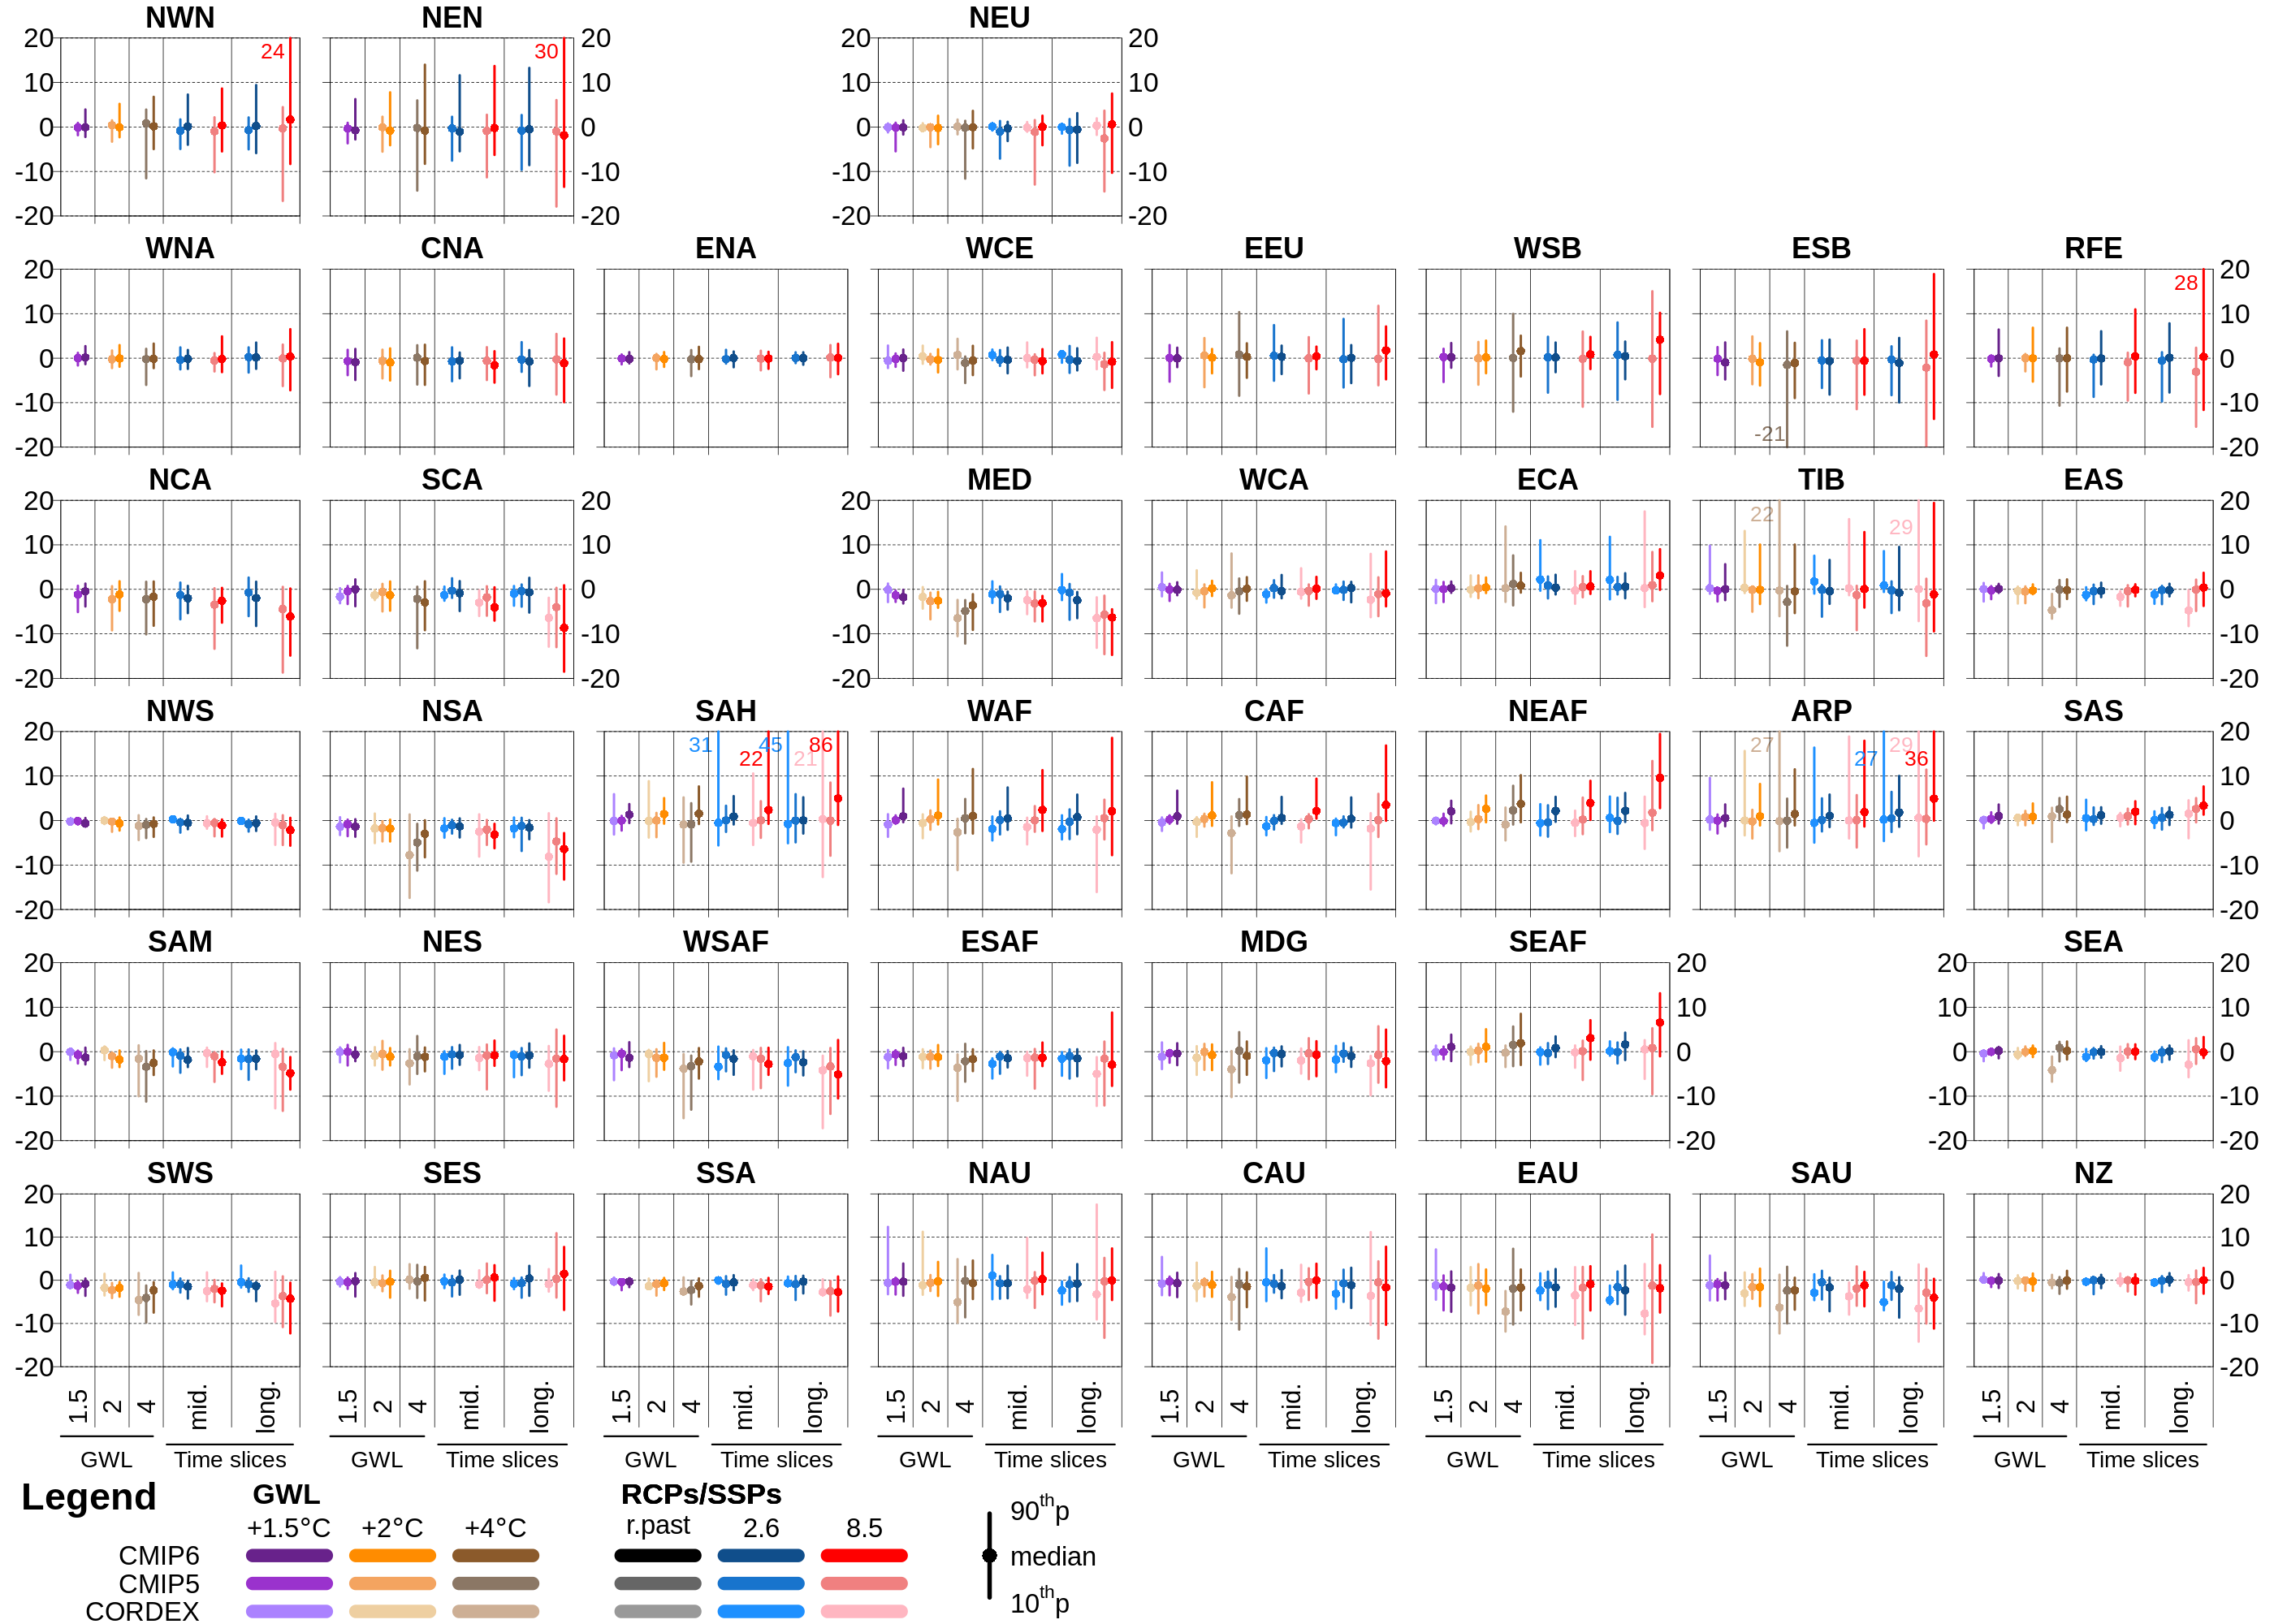

In [24]:
fsize = 2000
outfilename = paste(CWD,'/../../figs/Satellite_barplots/Figure_S12.4_SM_satellite.png',sep='')
png(outfilename, width=fsize*1.4,height=fsize)

#NWN, NEN  NA  # NEU,  NA   NA,  RAR, NA  #
#WNA, CNA, ENA  # WCE, EEU, WSB, ESB, RFE  #
#NCA, SCA, CAR  # MED, WCA, ECA, TIB, EAS  #
#NWS, NSA # SAH,  WAF, CAF, NEAF, ARP, SAS  #
#SAM, NES # WSAF, ESAF, MDG, SEAF, NA, SEA 
#SWS, SES, SSA  # NAU, CAU, EAU, SAU, NZ  #
# Colorbar
mat = rbind(
    c(1, 2, 0, 3, 0, 0, 0, 0),
    c(4, 5, 6, 7, 8, 9, 10,11),
    c(12, 13,0, 14, 15,16,17,18),
    c(19, 20, 21,22,23,24,25,26),
    c(27, 28, 29,30,31,32,0, 33),
    c(34, 35,36,37,38,39,40,41),
    c(42, 42, 42, 42,0,0 ,0, 0 )
)

AR6_regions = c('NWN', 'NEN', 'NEU', 
'WNA', 'CNA', 'ENA', 'WCE', 'EEU', 'WSB', 'ESB', 'RFE',
'NCA', 'SCA', 'MED', 'WCA', 'ECA', 'TIB', 'EAS',
'NWS', 'NSA', 'SAH', 'WAF', 'CAF', 'NEAF', 'ARP', 'SAS',
'SAM', 'NES', 'WSAF', 'ESAF', 'MDG', 'SEAF', 'SEA', 
'SWS', 'SES', 'SSA', 'NAU', 'CAU', 'EAU', 'SAU', 'NZ')

layout(mat,height=c(2,2,2,2,2,2.35,1.7),widths=c(1.15,1,1,1,1,1,1,1.15))


ylab = 'Whatever variable (unit)'
ylab = ''
for (i in 1:length(AR6_regions)){
    region_name = AR6_regions[i]
    plot_title = region_name
    do_ylab_left = 'FALSE'
    do_ylab_right = 'FALSE'
    mar=c(1,1,2.5,1)
    if (region_name %in% c('SWS', 'SES', 'SSA', 'NAU', 'CAU', 'EAU', 'SAU', 'NZ')){
        do_xlab = 'TRUE'
        mar[1]=4
    }else{
        do_xlab = 'FALSE'
    }
    if (region_name %in% c('NWN','WNA','NCA','NWS','SAM','SWS','NEU','RAR','SEA','MED')){
        do_ylab_left = 'TRUE'
    }
    if (region_name %in% c('NWN','WNA','NCA','NWS','SAM','SWS')){
        mar[2]=4
    }
    if (region_name %in% c('RFE','EAS','SAS','SEA','NZ','NEU','RAR','SEAF','NEN','SCA')){
        do_ylab_right = 'TRUE'
    }
    if (region_name %in% c('RFE','EAS','SAS','SEA','NZ')){
        mar[2]=1
        mar[4]=4
    }
    
    barplot_satellite_chap12(all_regions[[region_name]],plot_title, ylab, mar=mar,
                            do_xlab=do_xlab, do_ylab_left = do_ylab_left, do_ylab_right=do_ylab_right)
}
draw_legend_box_hor(all_regions[[region_name]])
dev.off()

library("IRdisplay")
display_png(file=outfilename)  

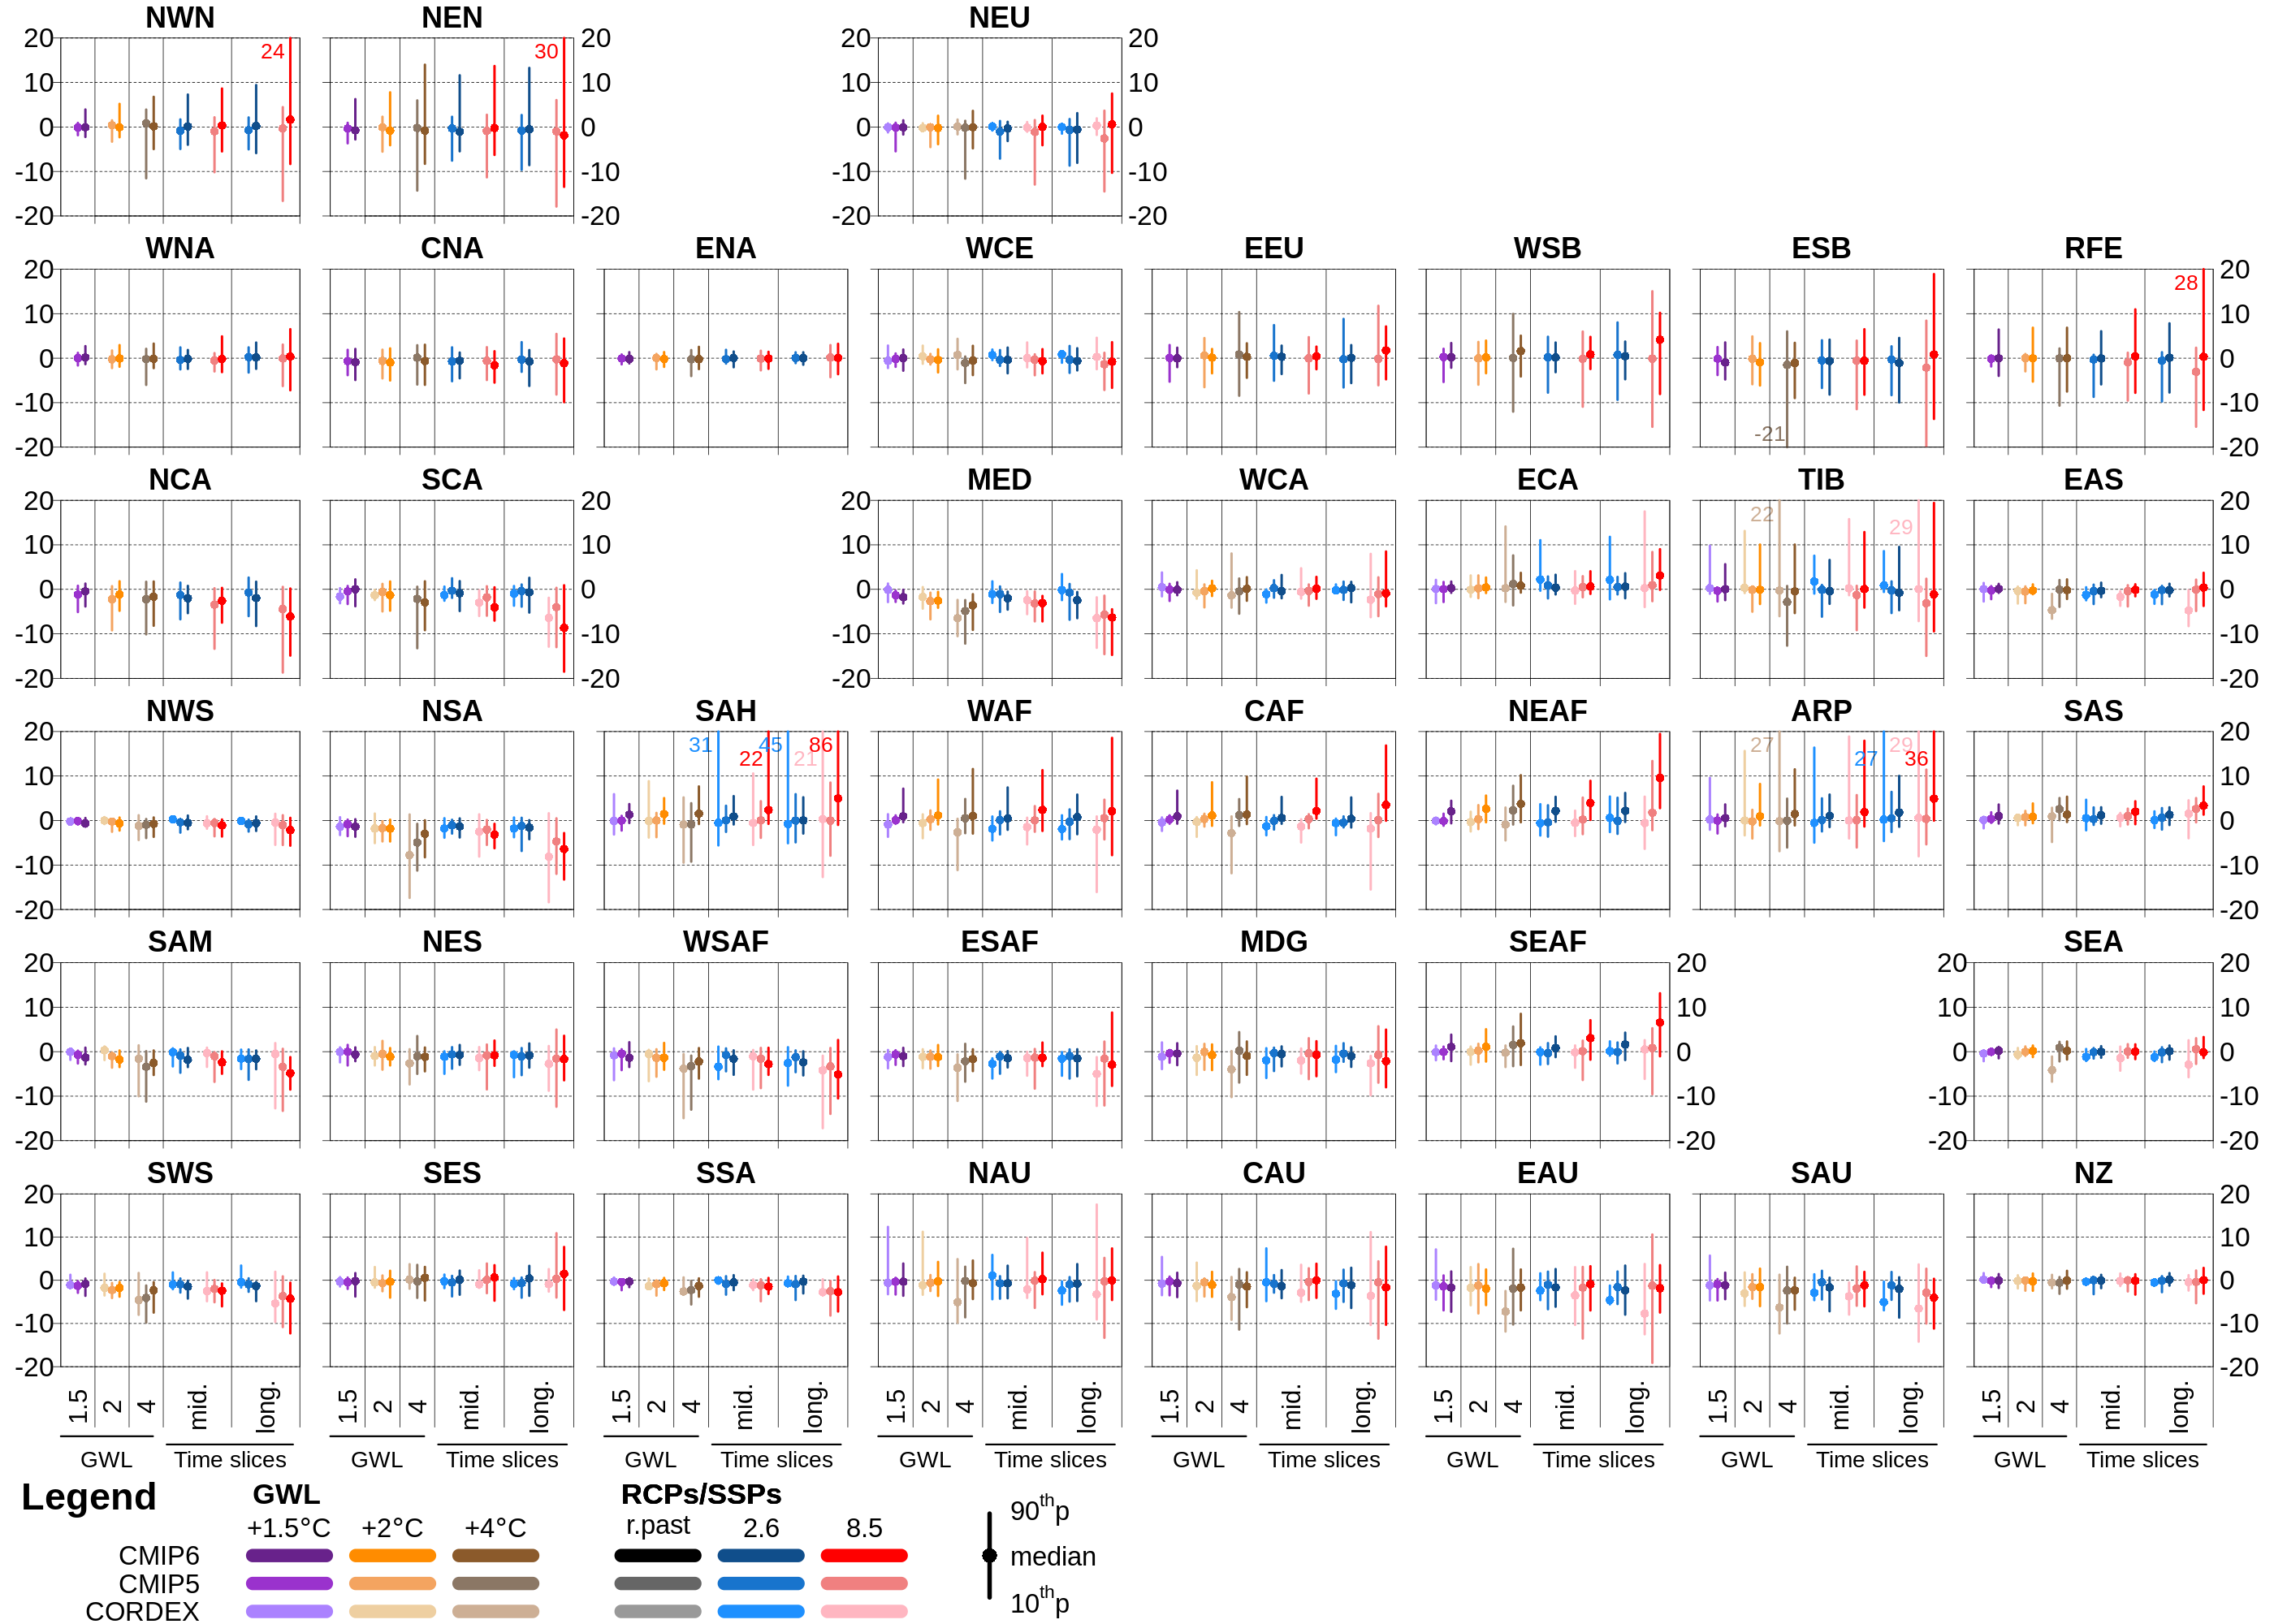

In [25]:
library("IRdisplay")
display_png(file=outfilename)  

## PDF

In [26]:
fsize = 20*1.4
outfilename = paste(CWD,'/../../figs/Satellite_barplots/Figure_S12.4_SM_satellite.pdf',sep='')
pdf(outfilename, width=fsize*1.4,height=fsize)

mat = rbind(
    c(1, 2, 0, 3, 0, 0, 0, 0),
    c(4, 5, 6, 7, 8, 9, 10,11),
    c(12, 13,0, 14, 15,16,17,18),
    c(19, 20, 21,22,23,24,25,26),
    c(27, 28, 29,30,31,32,0, 33),
    c(34, 35,36,37,38,39,40,41),
    c(42, 42, 42, 42,0,0 ,0, 0 )
)

AR6_regions = c('NWN', 'NEN', 'NEU', 
'WNA', 'CNA', 'ENA', 'WCE', 'EEU', 'WSB', 'ESB', 'RFE',
'NCA', 'SCA', 'MED', 'WCA', 'ECA', 'TIB', 'EAS',
'NWS', 'NSA', 'SAH', 'WAF', 'CAF', 'NEAF', 'ARP', 'SAS',
'SAM', 'NES', 'WSAF', 'ESAF', 'MDG', 'SEAF', 'SEA', 
'SWS', 'SES', 'SSA', 'NAU', 'CAU', 'EAU', 'SAU', 'NZ')

layout(mat,height=c(2,2,2,2,2,2.35,1.7),widths=c(1.15,1,1,1,1,1,1,1.15))


ylab = 'Whatever variable (unit)'
ylab = ''
for (i in 1:length(AR6_regions)){
    region_name = AR6_regions[i]
    plot_title = region_name
    do_ylab_left = 'FALSE'
    do_ylab_right = 'FALSE'
    mar=c(1,1,2.5,1)
    if (region_name %in% c('SWS', 'SES', 'SSA', 'NAU', 'CAU', 'EAU', 'SAU', 'NZ')){
        do_xlab = 'TRUE'
        mar[1]=4
    }else{
        do_xlab = 'FALSE'
    }
    if (region_name %in% c('NWN','WNA','NCA','NWS','SAM','SWS','NEU','RAR','SEA','MED')){
        do_ylab_left = 'TRUE'
    }
    if (region_name %in% c('NWN','WNA','NCA','NWS','SAM','SWS')){
        mar[2]=4
    }
    if (region_name %in% c('RFE','EAS','SAS','SEA','NZ','NEU','RAR','SEAF','NEN','SCA')){
        do_ylab_right = 'TRUE'
    }
    if (region_name %in% c('RFE','EAS','SAS','SEA','NZ')){
        mar[2]=1
        mar[4]=4
    }
    
    barplot_satellite_chap12(all_regions[[region_name]],plot_title, ylab, mar=mar,
                            do_xlab=do_xlab, do_ylab_left = do_ylab_left, do_ylab_right=do_ylab_right)
}
draw_legend_box_hor(all_regions[[region_name]])
dev.off()


[1] "1.5 CORDEX"
NULL
[1] "Skip this one"
[1] "1.5 CMIP5"
[1] -1.8482741 -0.1051806  0.9236221
[1] "1.5 CMIP6"
[1] -2.23842365 -0.06826023  3.92995540
[1] "2 CORDEX"
[1] NA NA NA
[1] "Skip this one"
[1] "2 CMIP5"
[1] -3.2975554  0.3825466  1.4900610
[1] "2 CMIP6"
[1] -2.30508518 -0.05532878  5.19293288
[1] "4 CORDEX"
[1] NA NA NA
[1] "Skip this one"
[1] "4 CMIP5"
[1] -11.5250215   0.8714568   3.9084169
[1] "4 CMIP6"
[1] -4.9637302  0.1435496  6.7758644
[1] "2.6_mid CORDEX"
NULL
[1] "Skip this one"
[1] "2.6_mid CMIP5"
[1] -4.9347447 -0.8626097  1.6978902
[1] "2.6_mid CMIP6"
[1] -3.9914518  0.1075686  7.2854872
[1] "8.5_mid CORDEX"
[1] NA NA NA
[1] "Skip this one"
[1] "8.5_mid CMIP5"
[1] -10.1596154  -0.9761138   2.1681994
[1] "8.5_mid CMIP6"
[1] -5.4879955  0.3470065  8.6387326
[1] "2.6_late CORDEX"
NULL
[1] "Skip this one"
[1] "2.6_late CMIP5"
[1] -5.0219001 -0.7223714  2.1395444
[1] "2.6_late CMIP6"
[1] -5.8650422  0.2288093  9.4259477
[1] "8.5_late CORDEX"
[1] NA NA NA
[1] "Skip this

[1] "1.5 CORDEX"
NULL
[1] "Skip this one"
[1] "1.5 CMIP5"
[1] -5.3516527  0.2506616  2.1031241
[1] "1.5 CMIP6"
[1] -2.1492400  0.1749785  3.3963284
[1] "2 CORDEX"
NULL
[1] "Skip this one"
[1] "2 CMIP5"
[1] -5.95982774 -0.03648927  3.64106325
[1] "2 CMIP6"
[1] -3.377637  0.178197  3.941006
[1] "4 CORDEX"
NULL
[1] "Skip this one"
[1] "4 CMIP5"
[1] -12.01297356   0.03947168   9.94158286
[1] "4 CMIP6"
[1] -4.111006  1.585638  5.051587
[1] "2.6_mid CORDEX"
NULL
[1] "Skip this one"
[1] "2.6_mid CMIP5"
[1] -7.7411473  0.2060259  4.8065051
[1] "2.6_mid CMIP6"
[1] -3.148004  0.178197  3.510283
[1] "8.5_mid CORDEX"
NULL
[1] "Skip this one"
[1] "8.5_mid CMIP5"
[1] -10.9096538  -0.1450016   5.9709924
[1] "8.5_mid CMIP6"
[1] -2.4364424  0.8724969  4.7744335
[1] "2.6_late CORDEX"
NULL
[1] "Skip this one"
[1] "2.6_late CMIP5"
[1] -9.3563570  0.7399306  8.0213083
[1] "2.6_late CMIP6"
[1] -4.7383048  0.4551213  3.7272066
[1] "8.5_late CORDEX"
NULL
[1] "Skip this one"
[1] "8.5_late CMIP5"
[1] -15.421749

[1] "1.5 CORDEX"
[1] -0.9927676  0.2469514  9.8068119
[1] "1.5 CMIP5"
[1] -2.7237381 -0.3249712  0.3800546
[1] "1.5 CMIP6"
[1] -2.42168321  0.03402153  5.64175393
[1] "2 CORDEX"
[1] -0.8254253  0.3699115 13.1093699
[1] "2 CMIP5"
[1] -5.0236255 -0.1171520  0.6578916
[1] "2 CMIP6"
[1] -3.2946661 -0.1038764 10.0597046
[1] "4 CORDEX"
[1] -6.0262705 -0.2855778 21.9285380
[1] "4 CMIP5"
[1] -12.6527957  -2.8457038   0.7458676
[1] "4 CMIP6"
[1] -5.3289778 -0.4609534 10.0597046
[1] "2.6_mid CORDEX"
[1] -0.9531373  1.7586553  7.5566542
[1] "2.6_mid CMIP5"
[1] -6.14459482 -0.09615409  0.98636932
[1] "2.6_mid CMIP6"
[1] -3.2555763 -0.4112648  6.5957717
[1] "8.5_mid CORDEX"
[1] -1.3158647  0.2257834 15.7770371
[1] "8.5_mid CMIP5"
[1] -9.1741190 -1.2904833  0.7845418
[1] "8.5_mid CMIP6"
[1] -4.10059230  0.07110571 12.87271857
[1] "2.6_late CORDEX"
[1] -0.5880138  0.8921944  8.5870609
[1] "2.6_late CMIP5"
[1] -5.3208599 -0.2167752  1.7842903
[1] "2.6_late CMIP6"
[1] -4.6858204 -0.7743504  9.5365951
[

[1] "1.5 CORDEX"
[1] -2.0718732  0.2275286  9.5778856
[1] "1.5 CMIP5"
[1] -2.90990736 -0.01724608  1.34575579
[1] "1.5 CMIP6"
[1] -1.2885422  0.5445782  3.6110764
[1] "2 CORDEX"
[1] -3.3261679534 -0.0004264016 15.6206389425
[1] "2 CMIP5"
[1] -4.0336326 -0.2043608  2.3986084
[1] "2 CMIP6"
[1] -1.1006387  0.9384502  8.2111681
[1] "4 CORDEX"
[1] -6.8864389 -0.1642584 27.3710281
[1] "4 CMIP5"
[1] -6.06328603 -0.06004816  4.91394936
[1] "4 CMIP6"
[1] -1.100639  1.460206 11.498745
[1] "2.6_mid CORDEX"
[1] -4.960566 -0.545855 16.377586
[1] "2.6_mid CMIP5"
[1] -2.4457634  0.1235729  4.9819996
[1] "2.6_mid CMIP6"
[1] -1.461951  1.050195  5.826849
[1] "8.5_mid CORDEX"
[1] -4.02644866  0.02231572 18.87442263
[1] "8.5_mid CMIP5"
[1] -6.05744416  0.08933259  5.71063860
[1] "8.5_mid CMIP6"
[1] -1.342454  1.906125 17.922462
[1] "2.6_late CORDEX"
[1] -4.6094642  0.2250894 27.4471303
[1] "2.6_late CMIP5"
[1] -2.5616696  0.4902823  6.4282153
[1] "2.6_late CMIP6"
[1] -1.410883  1.762640 10.029276
[1] "8.

[1] "1.5 CORDEX"
[1] -2.1337901 -0.4120730  0.3213587
[1] "1.5 CMIP5"
[1] -0.73199056 -0.03371804  0.58621883
[1] "1.5 CMIP6"
[1] -1.4811750  0.2171968  1.0769986
[1] "2 CORDEX"
[1] -1.6151231 -0.6333193  0.8293517
[1] "2 CMIP5"
[1] -0.94007876 -0.02471132  1.17946142
[1] "2 CMIP6"
[1] -1.2116420  0.1680514  1.3777996
[1] "4 CORDEX"
[1] -6.738283 -4.146668 -1.092594
[1] "4 CMIP5"
[1] -2.1772596  0.8956074  2.2084315
[1] "4 CMIP6"
[1] -1.756287  0.186993  2.280816
[1] "2.6_mid CORDEX"
[1] -2.0865349 -1.1626925  0.6011735
[1] "2.6_mid CMIP5"
[1] -1.53760338 -0.08135478  0.82106183
[1] "2.6_mid CMIP6"
[1] -1.35783539 -0.02970765  1.23984707
[1] "8.5_mid CORDEX"
[1] -4.265459 -1.461642  1.140091
[1] "8.5_mid CMIP5"
[1] -1.36270250  0.03578084  1.68336090
[1] "8.5_mid CMIP6"
[1] -1.673209336  0.006714584  1.649904014
[1] "2.6_late CORDEX"
[1] -2.09324427 -1.19604424  0.02050421
[1] "2.6_late CMIP5"
[1] -2.3548632 -0.1635695  0.9963036
[1] "2.6_late CMIP6"
[1] -1.7743353  0.1106262  1.381008

[1] "1.5 CORDEX"
[1] -0.3872533  0.1431290  1.6568068
[1] "1.5 CMIP5"
[1] -1.5634778 -0.1087562  0.3252142
[1] "1.5 CMIP6"
[1] -1.77268690 -0.06256457  1.43415982
[1] "2 CORDEX"
[1] -1.8804198 -0.1284383  1.1593566
[1] "2 CMIP5"
[1] -2.39927999 -0.01585119  0.61243326
[1] "2 CMIP6"
[1] -2.4158170 -0.2451209  1.5637900
[1] "4 CORDEX"
[1] -1.8507798 -0.5169642  1.2535894
[1] "4 CMIP5"
[1] -3.1281878 -0.5494919  0.7319113
[1] "4 CMIP6"
[1] -1.93965601 -0.05956342  2.18890360
[1] "2.6_mid CORDEX"
[1] -0.9636549 -0.3308104  0.1320919
[1] "2.6_mid CMIP5"
[1] -3.21542108  0.02813265  0.74447186
[1] "2.6_mid CMIP6"
[1] -1.81724519 -0.04909263  1.25832957
[1] "8.5_mid CORDEX"
[1] -1.3305205 -0.1627355  1.5666690
[1] "8.5_mid CMIP5"
[1] -2.580452142 -0.006656331  0.763560013
[1] "8.5_mid CMIP6"
[1] -3.3137474 -0.1100248  1.3966373
[1] "2.6_late CORDEX"
[1] -1.0482836 -0.5124274  0.1189001
[1] "2.6_late CMIP5"
[1] -2.75156836 -0.09748624  0.95919146
[1] "2.6_late CMIP6"
[1] -1.2288822  0.1404841 

png 
  2